# Ранговые критерии

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.stats.descriptivestats as sms

## Гипотезы о сдвиге

Воспользуемся реальными данными о студентах БПМИ211:
* grade_MS - итоговая неокруглённая оценка за курс математической статистики на 2 курсе
* grade_PSMO - оценка за КР по ПСМО на 3 курсе
* attending - посещает ли студент семинары (знает ли семинарист фамилию писавшего)
* PSMO_more - индикатор того, больше ли оценка студента за КР по ПСМО, чем оценка за курс МС

In [ ]:
import io
import pandas as pd
grades = pd.read_csv(io.StringIO('''
grade_MS,grade_PSMO,attending,PSMO_more
7.37,10.00,0,1
8.22,9.50,0,1
5.20,2.75,0,0
6.73,4.50,0,0
9.16,10.00,1,1
4.54,1.00,1,0
6.69,8.75,1,1
7.69,10.00,1,1
6.62,5.25,0,0
4.86,5.50,0,1
6.98,5.75,0,0
7.89,8.00,1,1
4.52,6.25,0,1
9.14,7.50,0,0
5.65,5.25,0,0
4.53,5.50,1,1
9.15,10.00,1,1
6.52,8.25,0,1
7.88,10.00,1,1
7.81,6.25,0,0
8.09,5.75,0,0
9.89,9.00,1,0
7.02,7.25,0,1
6.74,7.25,0,1
7.08,6.75,0,0
7.84,10.00,1,1
4.91,8.50,1,1
4.38,7.00,0,1
4.64,5.75,0,1
8.06,9.50,0,1
8.75,9.25,1,1
9.00,10.00,0,1
4.89,4.00,0,0
4.55,0.00,0,0
'''))

grades.head()

,grade_MS,grade_PSMO,attending,PSMO_more
0,7.37,10.00,0,1
1,8.22,9.50,0,1
2,5.20,2.75,0,0
3,6.73,4.50,0,0
4,9.16,10.00,1,1


In [ ]:
grades_attending = grades.loc[grades.attending==1].copy()
grades_attending

,grade_MS,grade_PSMO,attending,PSMO_more
4,9.16,10.00,1,1
5,4.54,1.00,1,0
6,6.69,8.75,1,1
7,7.69,10.00,1,1
11,7.89,8.00,1,1
15,4.53,5.50,1,1
16,9.15,10.00,1,1
18,7.88,10.00,1,1
21,9.89,9.00,1,0
25,7.84,10.00,1,1


### Критерий знаков

* $H_0: med(X) = m, ~~ H_A: med(X) \neq m.$

* $T=\sum_{i=1}^n I\{X_i \geq m\}\sim Bin(n,0.5)$

In [ ]:
T = grades_attending.PSMO_more.loc[grades_attending.PSMO_more>0.5].sum()
stats.binomtest(min(len(grades_attending)-T, T), len(grades_attending), 0.5)

BinomTestResult(k=2, n=12, alternative='two-sided', statistic=0.16666666666666666, pvalue=0.03857421875)

In [ ]:
# min (12-10, 10)
min(len(grades_attending)-T, T) / len(grades_attending)

0.16666666666666666

In [ ]:
T = 6
stats.binomtest(min(len(grades_attending)-T, T), len(grades_attending), 0.5)

BinomTestResult(k=6, n=12, alternative='two-sided', statistic=0.5, pvalue=1.0)

Гипотеза о том, что оценки за МС примерно такие же, как за ПСМО, отвергается на уровне значимости $\alpha=0.05$

В statsmodels есть реализация данного теста, но в качестве тестовой статистики предлагается брать
$$T=\frac{\sum\limits_{i=1}^n I\{X_i\ge m\}-\sum\limits_{i=1}^n I\{X_i< m\}}{2}$$

In [ ]:
sms.sign_test(grades_attending.PSMO_more, mu0=0.5)

(4.0, 0.03857421875)

### Критерий Манна-Уитни

[Wiki](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

* $H_0: \forall x ~~ F(x)=G(x)$
* $H_A: \exists \mu \neq 0 ~~ F(x) = G(x - \mu)$

1. Скинуть все наблюдения в одну выборку $Z_1,..,Z_{n+m}$, остортировать её по возрастанию.
2. Каждому наблюдению назначить ранг $R_i$, равный порядковому номеру элемента в ряду, если несколько элементов равны, назначить каждому ранг, равный среднему арифметическому их рангов.
3. Посчитать сумму рангов $R_X, R_Y$ наблюдений из выборок $X,Y$ и отклонения
\begin{align*}
&U_X = nm + \frac{n(n+1)}{2} - R_X,\\
&U_Y = nm + \frac{m(m+1)}{2} - R_Y;
\end{align*}
4. Вычислить статистику Манна-Уитни $U = min(U_X,U_Y)$ и принять решение с использованием квантилей.

In [ ]:
?stats.mannwhitneyu

In [ ]:
stats.mannwhitneyu(grades.loc[grades.attending==0].grade_PSMO,
                   grades.loc[grades.attending==1].grade_PSMO)

MannwhitneyuResult(statistic=62.5, pvalue=0.012453461552267144)

In [ ]:
stats.mannwhitneyu(grades.loc[grades.attending==0].grade_PSMO,
                   grades.loc[grades.attending==1].grade_PSMO,
                   alternative='greater')

MannwhitneyuResult(statistic=62.5, pvalue=0.9943815708006425)

In [ ]:
?stats.mannwhitneyus

In [ ]:
# самостоятельная реализация двухсторонней гипотезы
grades_MU = grades.sort_values('grade_PSMO')
grades_MU['rank'] = grades_MU.grade_PSMO.rank()
display(grades_MU.head(10))

n = len(grades_MU.loc[grades_MU.attending==0])
m = len(grades_MU.loc[grades_MU.attending==1])

R_x = grades_MU.loc[grades_MU.attending==0]['rank'].sum()
R_y = grades_MU.loc[grades_MU.attending==1]['rank'].sum()
print('R_x - ', R_x, '; R_y -', R_y)
U_x = n*m+n*(n+1)/2-R_x
U_y = n*m+m*(m+1)/2-R_y
print('U_x - ', U_x, '; U_y -', U_y)
print('U =', min(U_x, U_y))

,grade_MS,grade_PSMO,attending,PSMO_more,rank
33,4.55,0.00,0,0,1.0
5,4.54,1.00,1,0,2.0
2,5.20,2.75,0,0,3.0
32,4.89,4.00,0,0,4.0
3,6.73,4.50,0,0,5.0
8,6.62,5.25,0,0,6.5
14,5.65,5.25,0,0,6.5
9,4.86,5.50,0,1,8.5
15,4.53,5.50,1,1,8.5
28,4.64,5.75,0,1,11.0


R_x -  315.5 ; R_y - 279.5
U_x -  201.5 ; U_y - 62.5
U = 62.5


U распределён асимптотически нормально, поэтому для проверки гипотезы необходимо посмотреть квантиль этого значения и посчитать честно p-value

In [ ]:
# TODO p-value

### За рамками лекции

#### Тест Вилкоксона (signed-rank)

Похож на критерий знаков тем, что раобтает только для спаренных выборок.

Алгоритм:
1. Считаем разницу между элементами вектора $X$ и $Y$
2. Сортируем модули разницы |X_i-Y_i|
3. На основе отсортированного массива выдаём ранги $R_i$
4. Считаем сумму рангов $T^+$ и $T^-$ следующим образом:
$$T^+ = \sum \limits_{X_i-Y_i>0} R_i$$ $$T^- = \sum \limits_{X_i-Y_i<0} R_i$$
5.Тестовая статистика $T=T^+-T^-$ c [распределением Вилкоксона](https://github.com/scipy/scipy/blob/5e4a5e3785f79dd4e8930eed883da89958860db2/scipy/stats/_hypotests.py#L600)

[Wiki](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test)


In [ ]:
stats.wilcoxon(grades_attending.grade_MS, grades_attending.grade_PSMO)

WilcoxonResult(statistic=16.0, pvalue=0.0771484375)

In [ ]:
stats.wilcoxon(grades_attending.grade_MS-grades_attending.grade_PSMO)

WilcoxonResult(statistic=16.0, pvalue=0.0771484375)

#### Тест Вилкоксона (rank-sum)

По сути, то же самое, что и Манн-Уитни (всегда дают одинаковый вывод, p-value отличается в 4 знаке после запятой), но тестовая статистика отличается на константу.

Подробнее [здесь](https://stats.stackexchange.com/questions/79843/is-the-w-statistic-output-by-wilcox-test-in-r-the-same-as-the-u-statistic)

In [ ]:
stats.ranksums(grades.loc[grades.attending==0].grade_PSMO,
               grades.loc[grades.attending==1].grade_PSMO)

RanksumsResult(statistic=-2.504606146293654, pvalue=0.012258781553102425)

## Гипотезы о масштабе

Проверяем, порождены ли обе выборки из одного и того же распределения (одинакова ли дисперсия двух выборок)

### Критерий Ансари-Брэдли

* $H_0: ~\forall x ~~ F(x)=G(x)$
* $H_A: ~\exists \alpha>1 ~ F(\alpha x)=G(x).$

Алгоритм реализации:
1. Вычесть выборочную медиану из каждой выборки (!);
2. Скинуть все наблюдения в одну выборку $Z_1,..,Z_{n+m}$ и отсортировать её по возрастанию.
3. Каждому элементу назначить ранг, равный порядковому номеру в ряду. В случае, если есть повторения, можно использовать средний ранг (как выше), но есть тонкости и лучше использовать немного другую концепцию mid-rank.
4. Посчитать статистику:
$$AB=\frac{1}{2}n_x (n_x+n_y+1)-\sum\limits_{i=1}^{n_x} |(i)-0.5(n_x+n_y+1)|$$
5. Используя посчитанные квантили или аппроксимацию нормальным распределением принять решение.

Статистики для апроксимации нормального:

Мат ожидание для $H_0$:
$$\mu = 0.25 n_x (n_x+n_y+2) , n_x+n_y \text{ - чётное}$$
$$\mu = 0.25 n_x \frac{(n_x+n_y+1)^2}{n_x+n_y}, n_x+n_y \text{ - нечётное}$$

Дисперсия для $H_0$:
$$\sigma^2 = n_x n_y \frac{(n_x+n_y)^2-4}{48(n_x+n_y-1)} , n_x+n_y \text{ - чётное}$$
$$\sigma^2 = n_x n_y \frac{((n_x+n_y)^2+3)(n_x+n_y-1)}{48(n_x+n_y)^2}, n_x+n_y \text{ - нечётное}$$

In [ ]:
grades_AB = grades.copy()
grades_AB.loc[grades_AB.attending==0, 'grade_PSMO_minus_median'] = grades_AB.grade_PSMO - grades_AB.loc[grades_AB.attending==0].grade_PSMO.median()
grades_AB.loc[grades_AB.attending==1, 'grade_PSMO_minus_median'] = grades_AB.grade_PSMO - grades_AB.loc[grades_AB.attending==1].grade_PSMO.median()

grades_AB['rank'] = grades_AB.grade_PSMO_minus_median.rank()
grades_AB.sort_values('rank', inplace=True)
display(grades_AB.head(10))

print('statistic:', grades_AB.loc[grades_AB.attending==0]['rank'].sum())

,grade_MS,grade_PSMO,attending,PSMO_more,grade_PSMO_minus_median,rank
5,4.54,1.00,1,0,-8.125,1.0
33,4.55,0.00,0,0,-6.250,2.0
15,4.53,5.50,1,1,-3.625,3.0
2,5.20,2.75,0,0,-3.500,4.0
32,4.89,4.00,0,0,-2.250,5.0
3,6.73,4.50,0,0,-1.750,6.0
11,7.89,8.00,1,1,-1.125,7.0
14,5.65,5.25,0,0,-1.000,8.5
8,6.62,5.25,0,0,-1.000,8.5
9,4.86,5.50,0,1,-0.750,10.0


statistic: 403.0


Поскольку у нас есть одинаковые ранги у некоторых наблюдений, scipy использует апроксимацию нормального распределения, рассчитывая параметры нормального распределения по определённым формулам

Подробнее [здесь](https://github.com/scipy/scipy/blob/v1.11.4/scipy/stats/_morestats.py#L2511-L2668)

In [ ]:
stats.ansari(grades_AB.loc[grades_AB.attending==0].grade_PSMO,
             grades_AB.loc[grades_AB.attending==1].grade_PSMO)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:2635: UserWarning: Ties preclude use of exact statistic.
  warnings.warn("Ties preclude use of exact statistic.")


AnsariResult(statistic=215.5, pvalue=0.20730038905871007)

#### Синтетический пример для понимания

Берём два набора данных по 5 наблюдений:
* $\mu = 0.25\cdot 5 \cdot (10+2) = 15$
* $\sigma = 5 \cdot 5 \cdot (10^2-4) / (48 \cdot (9)) = 50 / 9 \approx 5.55$

Пример 1:
* X = [1, 2, 3, 4, 5]
* Y = [0, 0, 5, 6, 6]

* X-med = [-2, -1, 0, 1, 2]
* Y-med = [-5, -5, 0, 1, 1]

* rank X = [5.5-|3-5.5|, 5.5-|4-5.5|, 5.5-|5.5-5.5|, 5.5-|8-5.5|, 5.5-|10-5.5|] = [3, 4, 5.5, 3, 1]
* rank Y = [5.5-|1.5-5.5|, 5.5-|1.5-5.5|, 5.5-|5.5-5.5|, 5.5-|8-5.5|, 5.5-|8-5.5|] = [1.5, 1.5, 5.5, 3, 3]

* sum_X = 16.5
* sum_Y = 14.5

Пример 2:
* X = [20, 25, 50, 75, 100]
* Y = [10, 20, 80, 90, 100]

* X-med = [-30, -25, 0, 25, 50]
* Y-med = [-70, -60, 0, 10, 20]

* rank X = [5.5-|3-5.5|, 5.5-|4-5.5|, 5.5-|5.5-5.5|, 5.5-|9-5.5|, 5.5-|10-5.5|] = [3, 4, 5.5, 2, 1]
* rank Y = [5.5-|1-5.5|, 5.5-|2-5.5|, 5.5-|5.5-5.5|, 5.5-|7-5.5|, 5.5-|8-5.5|] = [1, 2, 5.5, 4, 3]

* sum (rank X) = 15.5
* sum (rank Y) = 15.5

In [ ]:
X = [1, 2, 3, 4, 5]
Y = [0, 0, 5, 6, 6]
stats.ansari(X, Y)

AnsariResult(statistic=20.5, pvalue=0.01525751224668934)

In [ ]:
# Как это реализовано в scipy
xy = np.r_[X, Y]
print(np.array((stats.rankdata(xy), 10-stats.rankdata(xy)+1)))
print(np.amin(np.array((stats.rankdata(xy), 10-stats.rankdata(xy)+1)), 0))
print(np.sum(np.amin(np.array((stats.rankdata(xy), 10-stats.rankdata(xy)+1)), 0)[:5]))

[[3.  4.  5.  6.  7.5 1.5 1.5 7.5 9.5 9.5]
 [8.  7.  6.  5.  3.5 9.5 9.5 3.5 1.5 1.5]]
[3.  4.  5.  5.  3.5 1.5 1.5 3.5 1.5 1.5]
20.5


Вывод:
* Статистика, получаемая в scipy, отличается по своей сути от той, что дана на лекции (и в учебнике по статистике), а также в [интернетах](https://aakinshin.net/posts/ansari-power/?ysclid=lpbnpev0i710392039)
* При этом проверяемое в гипотезе среднее считается точно так же, то есть корректная реализация и реализация из scipy даёт значимо разные результаты проверки гипотезы

In [ ]:
X = [20, 25, 50, 75, 100]
Y = [10, 20, 80, 90, 100]
stats.ansari(X, Y)

AnsariResult(statistic=18.0, pvalue=0.19160110675259334)

## Гипотезы о независимости

### Коэффициент корреляции Кэндалла

Кэндалл как сортировка пузырьком?

In [ ]:
# Calculating Kendall Rank correlation
corr, p_value = stats.kendalltau(grades.loc[grades.attending==1].grade_PSMO, grades.loc[grades.attending==1].grade_MS)
print('Kendall Rank correlation: %.5f' % corr)
print('p-value(H_0 = no correlation): %.5f' % p_value)

Kendall Rank correlation: 0.42767
p-value(H_0 = no correlation): 0.06329


Среди тех, кто ходит на пары, гипотеза о равенстсве корреляции 0 не отвергается на уровне значимости 0.05 -> нет зависимости между оценкой за МС и оценкой за кр по ПСМО для тех, кто ходит на пары

In [ ]:
# Calculating Kendall Rank correlation
corr, p_value = stats.kendalltau(grades.loc[grades.attending==0].grade_PSMO, grades.loc[grades.attending==0].grade_MS)
print('Kendall Rank correlation: %.5f' % corr)
print('p-value(H_0 = no correlation): %.5f' % p_value)

Kendall Rank correlation: 0.40976
p-value(H_0 = no correlation): 0.00850


Среди тех, кто не ходит на пары, гипотеза о равенстсве корреляции 0 отвергается на уровне значимости 0.05 -> есть зависимость между оценкой за МС и оценкой за кр по ПСМО для тех, кто не ходит на пары

In [ ]:
# Calculating Kendall Rank correlation
corr, p_value = stats.kendalltau(grades.grade_PSMO, grades.grade_MS)
print('Kendall Rank correlation: %.5f' % corr)
print('p-value(H_0 = no correlation): %.5f' % p_value)

Kendall Rank correlation: 0.47592
p-value(H_0 = no correlation): 0.00011


### Коэффициент корреляции Спирмена

In [ ]:
# Calculate the Spearman correlation coefficient
rho, p_value = stats.spearmanr(grades_attending.grade_PSMO, grades_attending.grade_MS)

print("Spearman correlation coefficient:", rho)
print('p-value(H_0 = no correlation): %.5f' % p_value)

Spearman correlation coefficient: 0.565588751373389
p-value(H_0 = no correlation): 0.05529


In [ ]:
X = np.array(grades_attending.grade_MS).reshape(-1, 1)
Y =  np.array(grades_attending.grade_PSMO).reshape(-1, 1)
beta = np.linalg.inv(X.T @ X) @ X.T @ Y
Y_pred = X @ beta.T

In [ ]:
lr = pd.DataFrame(np.hstack([X, Y_pred]), columns=['grade_MS', 'predict_grade_PSMO'])
lr

,grade_MS,predict_grade_PSMO
0,9.16,10.251494
1,4.54,5.080981
2,6.69,7.487172
3,7.69,8.606331
4,7.89,8.830162
5,4.53,5.069789
6,9.15,10.240302
7,7.88,8.818971
8,9.89,11.068480
9,7.84,8.774205


Spearman p_value: 0.055
Kendall p_value: 0.063


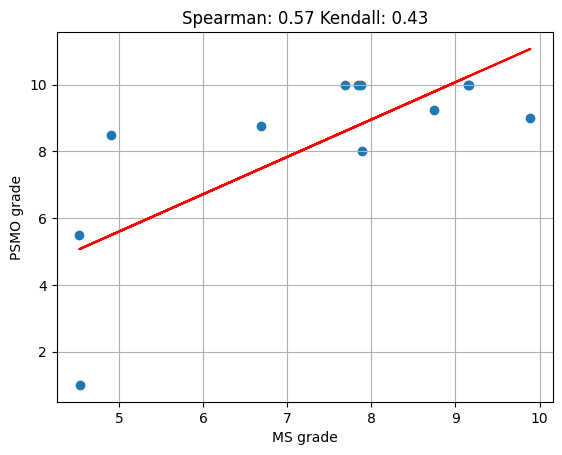

In [ ]:
# Calculate the Spearman correlation coefficient
rho, p_value_spearman = stats.spearmanr(grades_attending.grade_PSMO, grades_attending.grade_MS)
corr, p_value_kendall = stats.kendalltau(grades_attending.grade_PSMO, grades_attending.grade_MS)

print("Spearman p_value: {:.3f}".format(p_value_spearman))
print("Kendall p_value: {:.3f}".format(p_value_kendall))
plt.scatter(grades_attending.grade_MS, grades_attending.grade_PSMO)
plt.plot(lr.grade_MS, lr.predict_grade_PSMO, color="red")
plt.title("Spearman: {:.2f}".format(rho)+" Kendall: {:.2f}".format(corr))
plt.grid()
plt.xlabel("MS grade")
plt.ylabel("PSMO grade")
plt.show()

In [ ]:
X = np.array(grades.loc[grades.attending==0].grade_MS).reshape(-1, 1)
Y =  np.array(grades.loc[grades.attending==0].grade_PSMO).reshape(-1, 1)
beta = np.linalg.inv(X.T @ X) @ X.T @ Y
Y_pred = X @ beta.T

lr = pd.DataFrame(np.hstack([X, Y_pred]), columns=['grade_MS', 'predict_grade_PSMO'])
lr.head()

,grade_MS,predict_grade_PSMO
0,7.37,7.171068
1,8.22,7.998125
2,5.20,5.059641
3,6.73,6.548343
4,6.62,6.441312


Spearman p_value: 0.003
Kendall p_value: 0.009


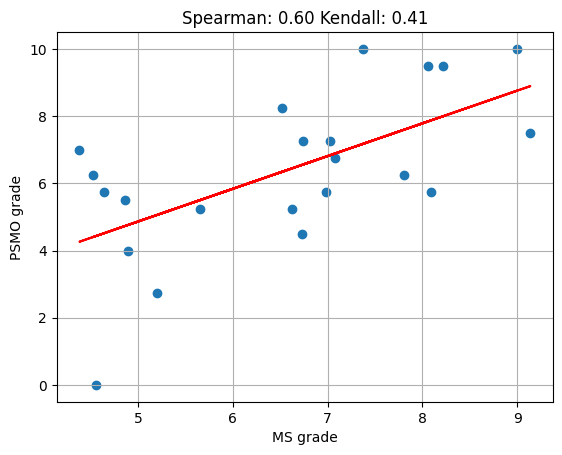

In [ ]:
# Calculate the Spearman correlation coefficient
rho, p_value_spearman = stats.spearmanr(grades.loc[grades.attending==0].grade_PSMO,
                                        grades.loc[grades.attending==0].grade_MS)
corr, p_value_kendall = stats.kendalltau(grades.loc[grades.attending==0].grade_PSMO,
                                         grades.loc[grades.attending==0].grade_MS)

print("Spearman p_value: {:.3f}".format(p_value_spearman))
print("Kendall p_value: {:.3f}".format(p_value_kendall))
plt.scatter(grades.loc[grades.attending==0].grade_MS,
            grades.loc[grades.attending==0].grade_PSMO)
plt.plot(lr.grade_MS, lr.predict_grade_PSMO, color="red")
plt.title("Spearman: {:.2f}".format(rho)+" Kendall: {:.2f}".format(corr))
plt.grid()
plt.xlabel("MS grade")
plt.ylabel("PSMO grade")
plt.show()

### Синтетический пример

In [ ]:
data = np.array([[50000, 8, 3],
                 [4, 1000, 6],
                 [7, 8, 9000]])

# Calculate the Spearman correlation matrix
rho, p_value = stats.spearmanr(data, axis=1)

print("Spearman correlation matrix:\n", rho)
print('p-value(H_0 = no correlation):\n', p_value)

Spearman correlation matrix:
 [[ 1.  -0.5 -1. ]
 [-0.5  1.   0.5]
 [-1.   0.5  1. ]]
p-value(H_0 = no correlation):
 [[0.         0.66666667 0.        ]
 [0.66666667 0.         0.66666667]
 [0.         0.66666667 0.        ]]


## Ссылочки

* [Критерий знаков](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2)
* [Критерий Манна-Уитни](https://ru.wikipedia.org/wiki/U-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%9C%D0%B0%D0%BD%D0%BD%D0%B0_%E2%80%94_%D0%A3%D0%B8%D1%82%D0%BD%D0%B8)
* [Критерий Ансари-Брэдли](https://studfile.net/preview/9307390/page:6/)
* [Корреляция Кэнделла](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)
* [Корреляция Спирмэна](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)
* [Задачки](https://www.matburo.ru/ex_ms.php?p1=msrk&ysclid=lmnjzsb83f697778781)
* [Критерии](http://www.machinelearning.ru/wiki/index.php?title=%D0%A0%D0%B0%D0%BD%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9)

